In [1]:
print('Supervised_Classification')

Supervised_Classification


### Setup working Environment:

In [16]:
# version 
import sys 
assert sys.version_info>=(3,5)
import sklearn 
assert sklearn.__version__>="0.20"

#warnings :
import warnings
warnings.filterwarnings('ignore')

# common imports 
import numpy as np
import pandas as pd 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# assert pretty visualisation plots:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = (20,9)

# saving visualisation function :
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/home/dhia/Pictures/', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### MNIST Dataset:
we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

In [21]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml(name="mnist_784",version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

• A data key containing an array with one row per instance and one column per
feature

• A target key containing an array with the labels

In [22]:
X,y=mnist['data'],mnist['target']
print(X.shape)
y.shape

(70000, 784)


(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).

Let's have a look at one digit from this datset

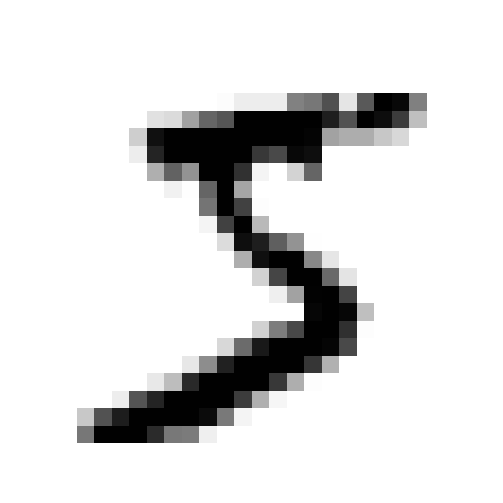

In [33]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [27]:
X[0].shape

(784,)

In [32]:
y=pd.to_numeric(y)
y[0] # is a column with the numbercorresponding to each instance(line ) 

5

**learn how to plot many digits using this function:**

```python 
   def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
   
   plt.figure(figsize=(9,9))
   example_images = X[:100]
   plot_digits(example_images, images_per_row=10)
   save_fig("more_digits_plot")
   plt.show() 
```


**But wait! You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):**
```python
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
```
**The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the traininginstances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen.**

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

This **“5-detector”** will be an example of a binary classifier, capable of
distinguishing between just **two classes, 5 and not-5**

In [35]:
# let's create the target vectors for this calssification task:

y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [39]:
# SGD classifier= capable of handling very large datasets 

from sklearn.linear_model import SGDClassifier
sgd_cl=SGDClassifier(random_state=42) 
# The SGDClassifier relies on randomness during training (hencethe name “stochastic”). If you want reproducible 
#results, you should set the random_state parameter.

sgd_cl.fit(X_train,y_train_5)
sgd_cl.predict([some_digit]) # always get 2D_array 
print('True detection')

True detection


###  Evaluating Performance : 
   
   **1. Measuring Accuracy Using Cross-Validation**

ccasionally you will need more control over the cross-validation process than what
Scikit-Learn provides off-the-shelf. In these cases, you can implement cross-
validation yourself;
```python
 from sklearn.model_selection import StratifiedKFlod
 from sklearn.base import clone

   str_kfolds=StartifiedKFold(n_splits=3,random_state=42)
   for train_index,test_index in str_kfolds.split(X_train,y_train_5):
      X_train_fold=X_train[train_index]
      y_train_fold=y_train_5[train_index]
      X_test_folds=X_train[test_index]
      y_test_folds=y_train_5[test_index]
      
      clone_clf=clone(sgd_cl)
      clone_clf.fit(X_train_fold,y_train_fold)
      predictions=clone_clf.predict(X_test_folds)
      nim_corrects=sum(predictions=y_test_folds)
      print(nim_corrects/len(y_pred))

```
The StratifiedKFold class performs stratified sampling 
to produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_cl,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 93% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class.

it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

### Performance using confusion matrix

In [42]:
# let's first make some predictions using cross_val_predict

from sklearn.model_selection import cross_val_predict
predictions=cross_val_predict(sgd_cl,X_train,y_train_5,cv=3)
pd.DataFrame(predictions).head()

,0
0,True
1,False
2,False
3,False
4,False
...,...
59995,False
59996,False
59997,True
59998,False


Just like the cross_val_score() function, **cross_val_predict()** performs K-fold
cross-validation, but instead of returning the evaluation scores, **it returns the predictions made on each test fold**. 

This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).

In [49]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_train_5,predictions)
pd.DataFrame(cnf_matrix,columns=['predicted_non-5(N)','predicted_5(P)'],index=['actual_non-5_value','actual_5_value'])

,predicted_non-5(N),predicted_5(P)
actual_non-5_value,53892,687
actual_5_value,1891,3530


- 53892 TN

- 687 FP

- 1891 FN

- 3530 TP

#### Precision:
- The confusion matrix gives you a lot of information, but sometimes you may prefer amore concise metric.
- An interesting one to look at is **the accuracy of the positive predictions**; this is called the precision of the classifier:

    **precision = TP/(TP + FP)**
    
    ---> if an instance is predicted and classified as positive(5_value), it has TP/(TP + FP) to be true 

#### Recall:
- also called sensitivity or **true positive rate** (relatively to all positive values) :this is the ratio of positive instances that are correctly detected

     **recall =TP/(TP + FN)**

     ---> percentage of positive values detected relatively to all positive values

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('precision: \n',precision_score(y_train_5,predictions))
print('recall: \n',recall_score(y_train_5,predictions))

precision: 
 0.8370879772350012
recall: 
 0.6511713705958311


- Now your 5-detector does not look as shiny as it did when you looked at its accuracy. **When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65% of the 5s.**

#### F1_score:

- it is often convenient to combine precision and recall into a single metric called the F1_score, in particular if you need a simple way to compare two classifiers. **The F1_score is the harmonic mean of precision and recall**. 
- Whereas the regular mean treats all values equally, the harmonic mean gives much **more weight to low values.**
- As a result, **the classifier will only get a high F1 score if both recall and precision are high**.

In [55]:
from sklearn.metrics import f1_score
f1_score(y_train_5,predictions)

0.7325171197343846

- The F1 score favors classifiers that have similar precision and recall. This is not alwayswhat you want: in some contexts you mostly care about precision, and in other con‐texts you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).


- Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called **the precision/recall tradeoff.**

#### precision/recall tradeoff:

- To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function,and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class


- **Scikit-Learn**does not let you set the threshold directly, **but it does give you access to the decision scores that it uses to make predictions**. **Instead of calling the classifier’s predict() method, you can call its decision_function() method**, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:

In [56]:
score_some_digit=sgd_cl.decision_function([some_digit])
score_some_digit    

array([2164.22030239])

In [57]:
threshold=0 # when threshold is equal to 0 ,the classifier returns the same result as the predict() method
prediction_some_digit=(score_some_digit>threshold)
prediction_some_digit

array([ True])

In [58]:
# let's choose an other value of threshold
threshold=8000
new_prediction_some_digit=(score_some_digit>threshold)
new_prediction_some_digit

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.


**Now how do you decide which threshold to use? **

For this you will first need to get the
scores of all instances in the training set using the **cross_val_predict()** function
again, but this time **specifying that you want it to return decision scores instead of
predictions**

In [62]:
from sklearn.model_selection import cross_val_predict
thresholds_scores=cross_val_predict(sgd_cl,X_train,y_train_5,cv=3,method='decision_function') # means that predictions
# is used with different thresholds

In [65]:
pd.DataFrame(thresholds_scores,columns=['instance_score'])
## plotting precion_recall_curve
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,thresholds_scores)

Saving figure precision_recall_vs_threshold_plot


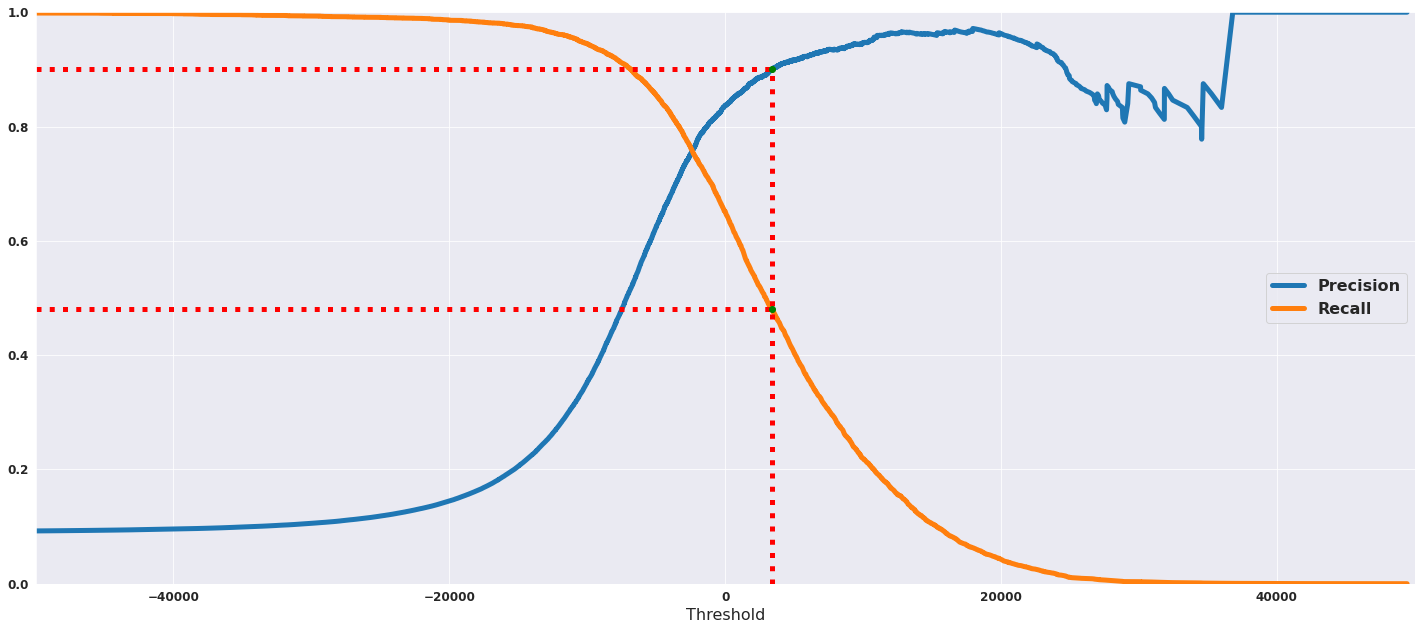

In [97]:
def precision_recall_curve(precisions,recalls,predictions):
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],label='Recall')
    plt.grid(b=True)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    
sns.set_style("darkgrid")    
precision_recall_curve(precisions,recalls,predictions)  

#plotting linear functions(droites) and points
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")       #linear function giving two points and their coords   
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "go")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "go")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")               

In [94]:
# we want 0.9 of precision: let's serach for corresponding recall and threshold
recall_90_precision=recalls[np.argmax(precisions >= 0.9)]
threshold_90_precision=thresholds[np.argmax(precisions >= 0.9)]

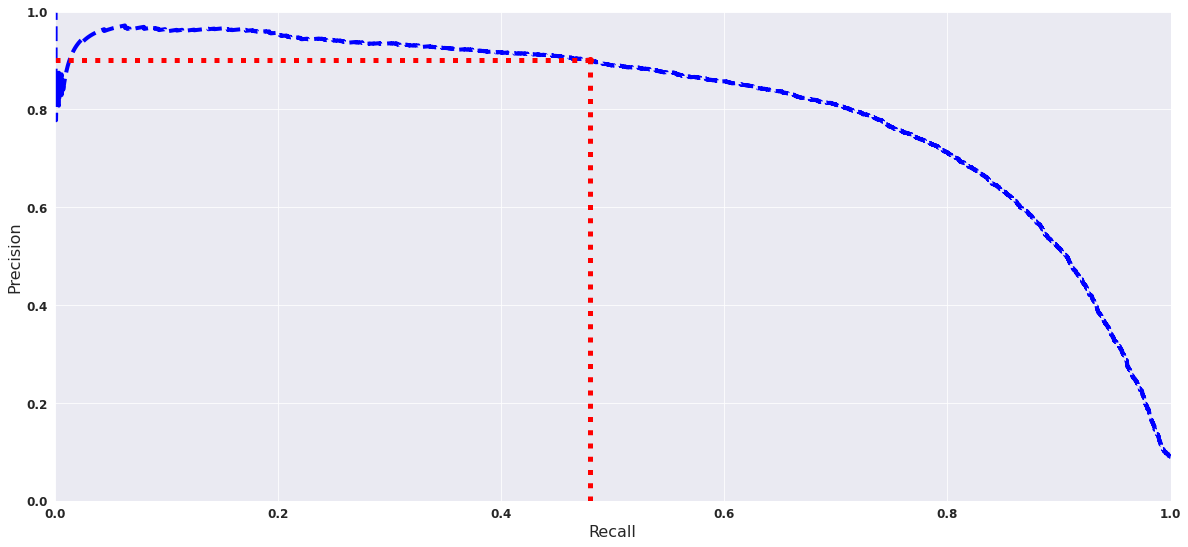

In [103]:
#Another way to select a good precision/recall tradeoff is to plot precision directly against recal
def precision_vs_recall(precisions,recalls):
    plt.plot(recalls, precisions, "b-", linewidth=4) #'b-' continuous blue line or 'b--'
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")    
    

- You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 60% recall. But of course the choice depends on your project.


- So let’s suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8,000. To be more precise you can search for the lowest threshold that gives you at least 90% precision ( np.argmax() will give us the first index of the maximum value,

In [105]:
# that's a pipeline in case of aiming 0.9 precision:
#(To make predictions (on the training set for now), instead of calling the classifier’spredict() method, 
#you can just run this code:)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
y_train_pred_90 = (thresholds_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

3370.0194991439557
0.9000345901072293
0.4799852425751706


Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its
recall is too low!

#### ROC Curve

- The receiver operating characteristic **(ROC) curve** is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, **the ROC curve plots the true positive rate (another name for recall) against the false positive rate**. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. **Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.**


- **To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values**

In [106]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,thresholds_scores)


No handles with labels found to put in legend.


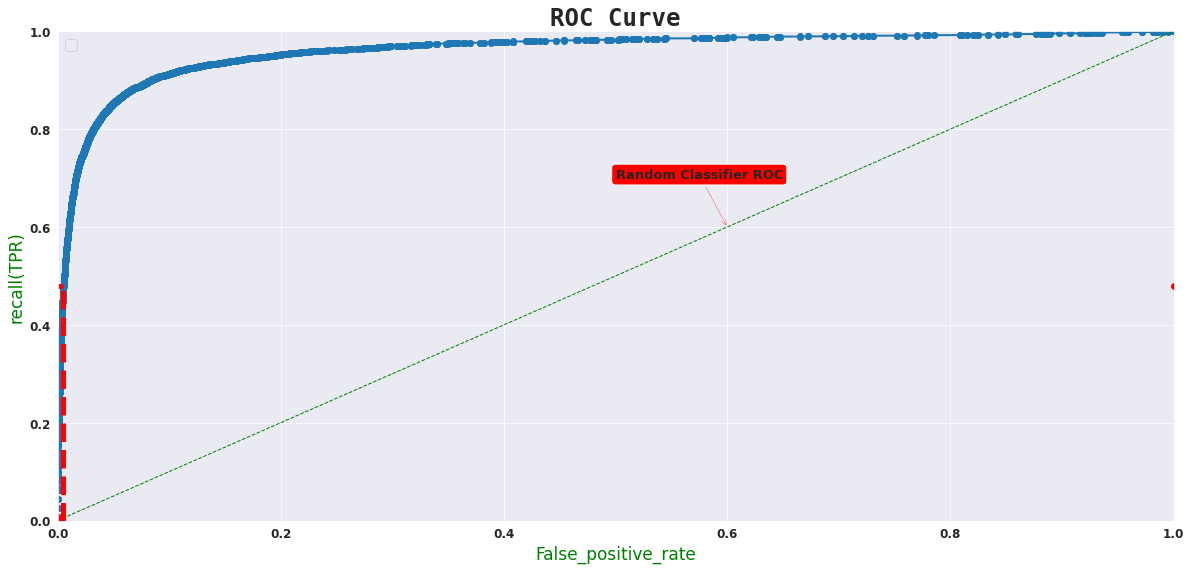

In [156]:
sns.set_style('darkgrid')
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,"o-",linewidth=2,label=label)
  plt.grid(b=True) 
  plt.axis([0,1,0,1]) # [xmin, xmax, ymin, ymax]
  plt.title('ROC Curve',fontdict={'family' : 'monospace',
                                  'weight' : 'bold',
                                  'size'   : 24})
  plt.xlabel('False_positive_rate',fontsize=17,color='green')
  plt.ylabel('recall(TPR)',fontsize=17,color='green') 
  plt.annotate('Random Classifier ROC',xy=(0.6,0.6),xytext=(0.5,0.7),fontsize=13,
                   arrowprops=dict(arrowstyle='->',ec='red',lw=0.3),bbox=dict(boxstyle="round",fc='red')) 
  plt.plot([0.0,1.0],[0.0,1.0],"g--",linewidth=1)  
  plt.legend()
   
plot_roc_curve(fpr,tpr)
 #dashed diagonal
fpr_90=fpr[np.argmax(tpr>= recall_90_precision)]
plt.plot([fpr_90_precision,fpr_90],[0.0,recall_90_precision],"r--")
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r--")
plt.plot([fpr_90,recall_90_precision],'ro')

- Once again there is a **tradeoff**: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purelyrandom classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


- **One way to compare classifiers is to measure the area under the curve (AUC)**. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,thresholds_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. 


For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the top-
right corner).

### ROC and AUC_score of RandomForest CLassifier (comparing with the SGD classifier):

Let’s train a **RandomForestClassifier** and compare its ROC curve and ROC AUC
score to the SGDClassifier

the **RandomForestClassifier class does not have a decision_function()** method. **Instead it has a predict_proba() method**. 

Scikit-Learn classifiers generally have one or the other. 


**The predict_proba()** method returns an array containing a row per instance and a col‐
umn per class, each containing the probability that the given instance belongs to the
given class (e.g., 70% chance that the image represents a 5)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

random_forest_classifier=RandomForestClassifier(random_state=42)
# making our predictions
proba_predictions=cross_val_predict(random_forest_classifier,X_train,y_train_5,cv=3,method='predict_proba')
# showing predictions

pd.DataFrame(proba_predictions)

,0,1
0,0.11,0.89
1,0.99,0.01
2,0.96,0.04
3,1.00,0.00
4,0.99,0.01
...,...,...
59995,1.00,0.00
59996,1.00,0.00
59997,0.02,0.98
59998,0.92,0.08


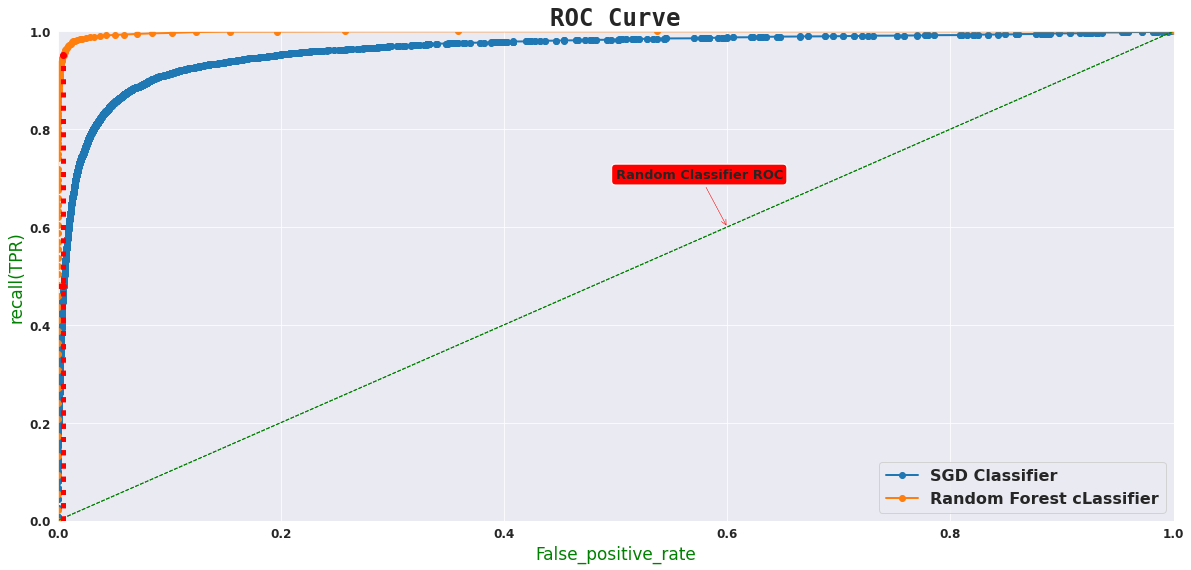

In [159]:
RF_scores=proba_predictions[:,1]
RF_fpr,RF_tpr,Rf_thresholds=roc_curve(y_train_5,RF_scores)

#plotting results:

plot_roc_curve(fpr,tpr,"SGD Classifier")
plot_roc_curve(RF_fpr,RF_tpr,"Random Forest cLassifier")
plt.legend(loc="lower right", fontsize=16)


# aim: 90_Precision:
recall_for_forest = RF_tpr[np.argmax(RF_fpr >= fpr_90)]

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.show()

**The RandomForestClassifier ’s ROC curve looks much
better than the SGDClassifier ’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better**


In [161]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,RF_scores)

0.9983436731328145

**Try measuring the precision and recall scores: you should find 99.0% precision and
86.6% recall. Not too bad!**


Hopefully you now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/
recall tradeoff that fits your needs, and compare various models using ROC curves
and ROC AUC scores. Now let’s try to detect more than just the 5s.

###  Multiclass Classification:

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
capable of handling multiple classes directly. Others (such as Support Vector Machine
classifiers or Linear classifiers) are strictly binary classifiers. However, there are vari‐
ous strategies that you can use to perform multiclass classification using multiple
binary classifiers:

- **OvA**:  
train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score.


- **OvO**: 
train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels.


For most binary classification algorithms, however, OvA is preferred.Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO).

In [162]:
sgd_cl.fit(X_train,y_train)
sgd_cl.predict([some_digit])

array([3])

This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 ( y_train ), instead of the 5-versus-all target classes
( y_train_5 ). Then it makes a prediction (a correct one in this case). Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.


To see that this is indeed the case, you can call the decision_function() method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:
```python 
   some_digit_scores = sgd_clf.decision_function([some_digit])
   some_digit_scores
    ### array([[-15955.22627845, -38080.96296175, -13326.66694897,573.52692379, -17680.6846644,2412.53175101,25526.86498156, -12290.15704709, -7946.05205023,-10631.35888549]])
   np.argmax(some_digit_scores)
   # 5 
   sgd_clf.classes_
    # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
   
```    


When a classifier is trained, **it stores the list of target classes in its
classes_ attribute, ordered by valu**. In this case, the index of each
class in the classes_ array conveniently matches the class itself
(e.g., the class at index 5 happens to be class 5), but in general you
won’t be so lucky.



If you want to force ScikitLearn to use **one-versus-one or one-versus-all**, you can use
the OneVsOneClassifier or OneVsRestClassifier classes:

In [163]:
from sklearn.multiclass import OneVsOneClassifier
ovo=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo.fit(X_train,y_train)
ovo.predict([some_digit])

array([5])

In [164]:
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier.predict([some_digit])

array([5])

In [166]:
pd.DataFrame(random_forest_classifier.predict_proba([some_digit]))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.01,0.08,0.0,0.9,0.0,0.0,0.0,0.01


In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_cl, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [169]:
# we can boost the performance by scaling our inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_cl, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

Of course, if this were a real project, you would follow the steps in your Machine
Learning project checklist (see ???): exploring data preparation options, trying out
multiple models, shortlisting the best ones and fine-tuning their hyperparameters
using GridSearchCV , and automating as much as possible, as you did in the previous
chapter. Here, we will assume that you have found a promising model and you want
to find ways to improve it. One way to do this is to analyze the types of errors it
makes.


First, you can look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix() function,

In [170]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_predict=cross_val_predict(sgd_cl,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_predict)
pd.DataFrame(conf_mx)

,0,1,2,3,4,5,6,7,8,9
0,5577,0,22,5,8,43,36,6,225,1
1,0,6400,37,24,4,44,4,7,212,10
2,27,27,5220,92,73,27,67,36,378,11
3,22,17,117,5227,2,203,27,40,403,73
4,12,14,41,9,5182,12,34,27,347,164
5,27,15,30,168,53,4444,75,14,535,60
6,30,15,42,3,44,97,5552,3,131,1
7,21,10,51,30,49,12,3,5684,195,210
8,17,63,48,86,3,126,25,10,5429,44
9,25,18,30,64,118,36,1,179,371,5107


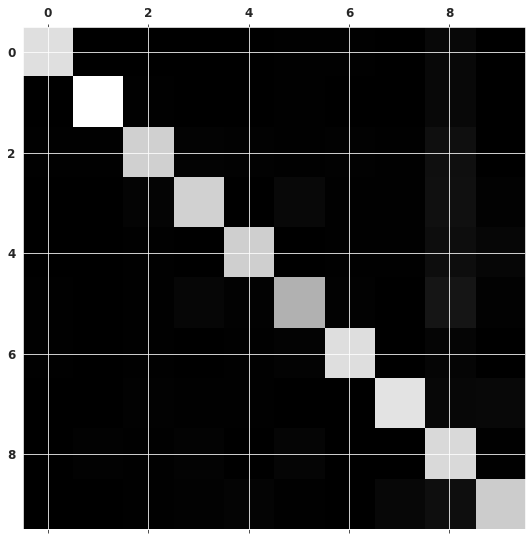

In [172]:
#That’s a lot of numbers. It’s often more convenient to look at an image representation
#of the confusion matrix, using Matplotlib’s matshow() function:

plt.matshow(conf_mx,cmap=plt.cm.gray)   

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits. In fact, you can verify
that both are the case.

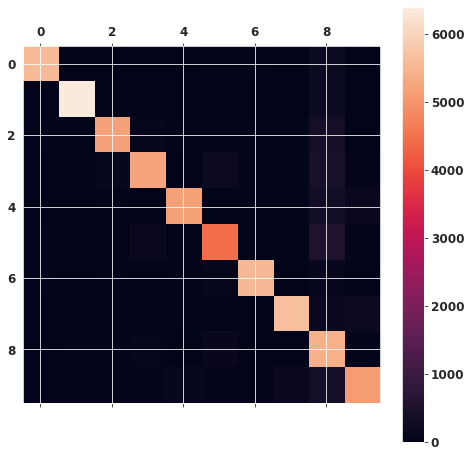

In [175]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)    

Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare **error
rates** instead of absolute number of errors (which would make abundant classes look
unfairly bad)

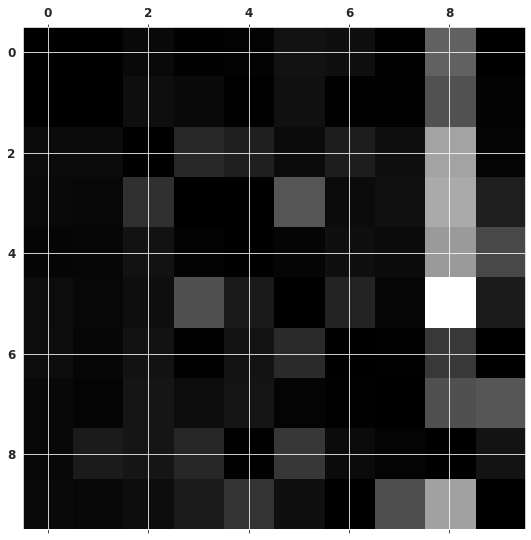

In [176]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

## Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. 

The column for
class 8 is quite bright, which tells you that many images get misclassified as 8s. However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. As you can see, the confusion matrix is not necessarily
symmetrical. 

You can also see that 3s and 5s often get confused (in both directions).
Analyzing the confusion matrix can often give you insights on ways to improve your
classifier. 

Looking at this plot, it seems that your efforts should be spent on reducing
the false 8s. For example, you could try to gather more training data for digits that
look like 8s (but are not) so the classifier can learn to distinguish them from real 8s.
Or you could engineer new features that would help the classifier—for example, writ‐
ing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has
none).


However, most misclassified images seem like obvious
errors to us, and it’s hard to understand why the classifier made the mistakes it did. 3
The reason is that we used a simple SGDClassifier , which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new image it just
sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s
differ only by a few pixels, this model will easily confuse them.


The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left,
the classifier might classify it as a 5, and vice versa. In other words, this classifier is
quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion
would be to preprocess the images to ensure that they are well centered and not too
rotated. This will probably help reduce other errors as well.


### Multilabel Classification:

In some cases you
may want your classifier **to output multiple classes for each instance.** For example,
consider a face-recognition classifier: what should it do if it recognizes several people
on the same picture? Of course it should attach one tag per person it recognizes. Say
the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then
when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning
“Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple
binary tags is called a **multilabel classification system.**

In [180]:
# let's create a multilabel target array
y_target_1=(y_train >= 7)
y_target_2=(y_train %2 ==1)
y_multilabel=np.c_[y_target_1,y_target_2] # using np.c_ to concatenate arrays np.c_[array1,array2]
print(y_target_1.shape,y_target_2.shape,y_multilabel.shape)

(60000,) (60000,) (60000, 2)


In [189]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [190]:
knn_classifier.predict([some_digit])

array([[False,  True]])

it gets it right! The digit 5 is indeed not large ( False ) and odd ( True ).

There are many ways to evaluate a multilabel classifier, and selecting the right metric
really depends on your project. For example, one approach is to measure **the F1 score
for each individual label** (or any other binary classifier metric discussed earlier), then
**simply compute the average score.**


In [195]:
predictions=cross_val_predict(knn_classifier,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,predictions,average="macro")

0.976410265560605

This assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want
to give more weight to the classifier’s score on pictures of Alice. 

One simple option is
to give each label a weight equal to its support (i.e., the number of instances with that
target label). To do this, **imply set average="weighted"** in the preceding code.

In [197]:
f1_score(y_multilabel,predictions,average="weighted") # there are other options for average in the documentation

0.9778357403921755

### Multioutput Classification:

(-0.5, 780.5, 880.5, -0.5)

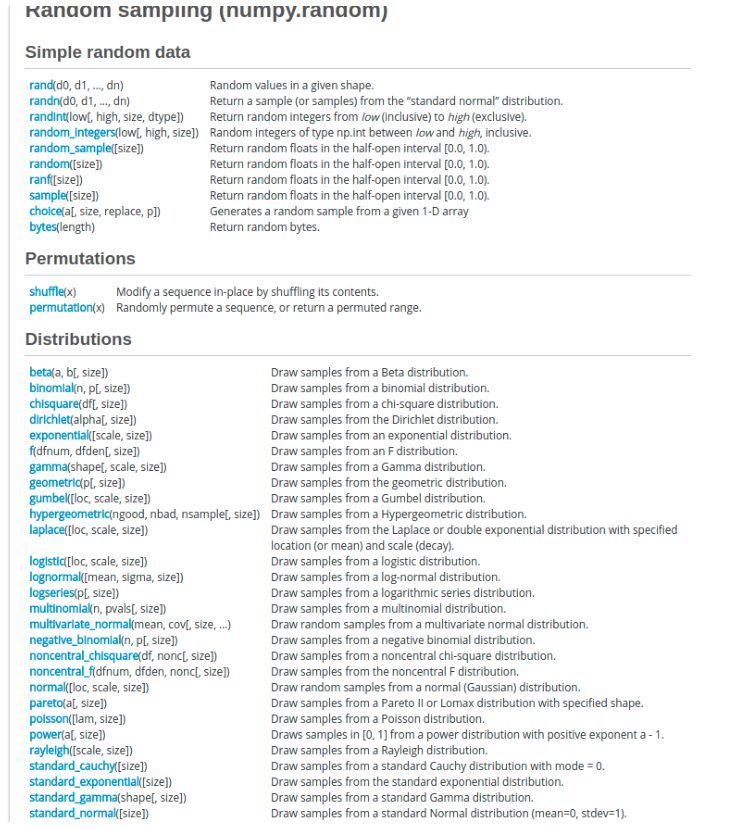

In [202]:
## some documentation on **Random Sampling**
from PIL import Image
photo=Image.open('/home/dhia/Pictures/random_documentation.png')
arr_rhayem=np.array(photo)
plt.figure(figsize=(20,15))
plt.imshow(photo)
plt.axis("off")

It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values).


To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the
classifier’s output is multilabel (one label per pixel) and each label can have multiple
values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.

In [203]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [205]:
def plot_digit(digit):
    image = digit.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

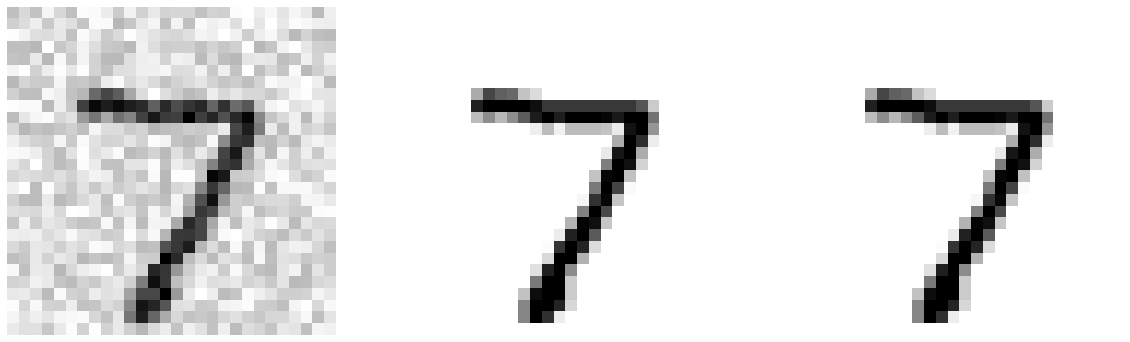

In [209]:
#let's get an exemple from the test set (yes, we’re snooping on the test data, so
#you should be frowning right now):
some_index = 0
plt.subplot(131); plot_digit(X_test_mod[some_index])
plt.subplot(132); plot_digit(y_test_mod[some_index])
plt.subplot(133);plot_digit(X_test[some_index])
plt.show

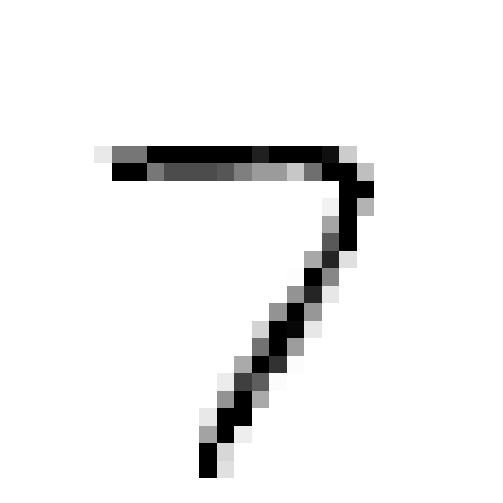

In [210]:
knn_classifier.fit(X_train_mod, y_train_mod)
clean_digit = knn_classifier.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

Looks close enough to the target! This concludes our tour of classification. Hopefully
you should now know how to select good metrics for classification tasks, pick the
appropriate precision/recall tradeoff, compare classifiers, and more generally build
good classification systems for a variety of tasks.